# Kaggle Competition: Building a survival model for the Titanic 

<b>Author: Siôn William Davies, Date: 25/11/2020 </b>

In this notebook, I present a quick approach to Kaggle's Titanic competition. The aim is to correctly predict the likelihood of someone surviving the crash based on the relevant data.

<b>Best score: 0.84 </b>

In [2]:
import pandas as pd
import numpy as np

# 1.) Import the Data

In [3]:
df_train = pd.read_csv("/Users/siondavies/Desktop/Kaggle/Titanic/titanic_data/train.csv")

Data fields... 

- PassengerId: Unique ID of the passenger.
- Survived: Survived (1) or died (0).
- Pclass: Passenger's class (1st, 2nd or 3rd).
- Age: Age in years (it appears fractional if < 1). 
- SibSp: Number of siblings / spouses aboard the ship.
- Parch: Number of children / parents aboard the ship (if child travelling with Nanny = 0).
- Ticket: ticket number
- Fare: Passenger fare.
- Cabin: cabin number.
- Embarked: Port of embarkation (C = Cherbourg, Q = Queenstown, S = Southampton).

In [4]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
len(df_train)

891

In [6]:
df_train.isnull().sum() 

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
df_train.fillna(df_train.mean(), inplace=True)

In [8]:
df_test = pd.read_csv("/Users/siondavies/Desktop/Kaggle/Titanic/titanic_data/test.csv")

In [9]:
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [10]:
len(df_test)

418

In [11]:
df_test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [12]:
df_test.fillna(df_test.mean(), inplace=True)

# 2.) Data Exploration Analysis (EDA)

Checking that training and test files have the same columns in common.

In [13]:
print('Training columns: ', df_train.columns)
print()
print('Test columns: ', df_test.columns)

Training columns:  Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

Test columns:  Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

## i.) Let's explore the effect of gender on survival...

Overall gender ratios

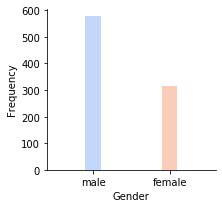

In [15]:
goldGrid = sns.FacetGrid(df_train, hue='Sex',palette='coolwarm')
goldGrid = goldGrid.map(plt.hist,'Sex', bins=5,alpha=0.7)
goldGrid.axes[0,0].set_xlabel('Gender')
goldGrid.axes[0,0].set_ylabel('Frequency')
plt.show()

Percentage chances of survival based on Gender...

In [16]:
male_survival = df_train.loc[df_train.Sex == 'male']["Survived"]
male_rate = sum(male_survival)/len(male_survival)

print('Total % of men to survive: ', male_rate)

female_survival = df_train.loc[df_train.Sex == 'female']["Survived"]
female_rate = sum(female_survival)/len(female_survival)

print('Total % of women to survive: ', female_rate)

Total % of men to survive:  0.18890814558058924
Total % of women to survive:  0.7420382165605095


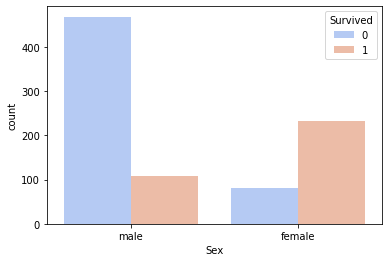

In [17]:
sns.countplot(x ='Sex', hue='Survived', data=df_train, palette="coolwarm")

0 = Died, 1 = Survived

So from the above graphics/statistics we see more women survived, and men had a much lower chance of survival on average vs. women. This informs us women may have been prioritised in rescue efforts. Therefore, Sex will be a pivotal feature to use.

## ii.) Let's explore the effect of class on survival...

Overall class distribution

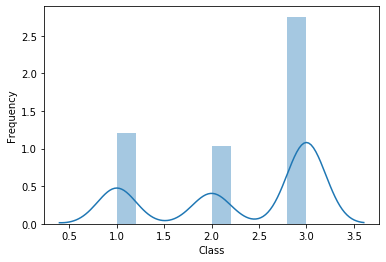

In [18]:
ax = sns.distplot(df_train['Pclass'])
ax.set(xlabel= 'Class', ylabel= 'Frequency')
plt.show()

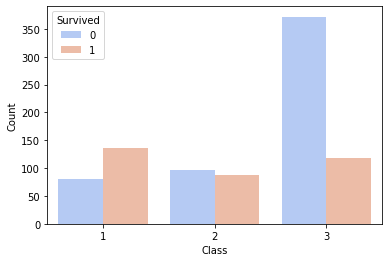

In [19]:
ax = sns.countplot(x ='Pclass', hue='Survived', data=df_train, palette="coolwarm")
ax.set(xlabel= 'Class', ylabel= 'Count' )
plt.show()

0 = Died, 1 = Survived

From the above histogram shows us there were far more 3rd class passengers in total, with 1st and 2nd comprising roughly the same amount as each other.
The countplot shows us that first class passengers were the only class who had a better chance of survial than death. 2nd class passengers were just over 50% more likely to perish... whereas 3rd class passengers had a terrible survival rate.


Accordingly - Class is a great indicator for chances of survival! The wealthy were far more likely to survive.

## iii.) Let's explore the effect of age on survival...

First we look at the overall age distribution amongst Titanic passengers.

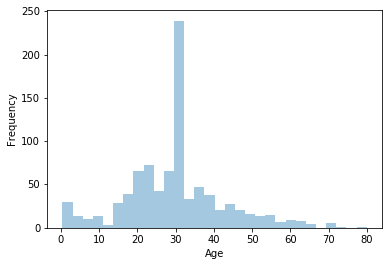

In [20]:
ax = sns.distplot(df_train['Age'], kde=False)
ax.set(xlabel='Age', ylabel='Frequency')
plt.show()

In [21]:
pd.pivot_table(df_train, index= 'Survived', values = ['Age'])

,Age
Survived,
0,30.415100
1,28.549778


Survived
0    AxesSubplot(0.125,0.125;0.775x0.755)
1    AxesSubplot(0.125,0.125;0.775x0.755)
Name: Age, dtype: object

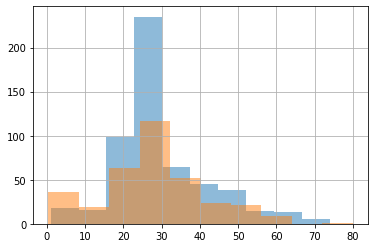

In [22]:
df_train.groupby('Survived').Age.hist(alpha=0.5)

X_axis = Age
Y_axis = Count

Blue = Died, 
Orange = Survived

array([<matplotlib.axes._subplots.AxesSubplot object at 0x1a263eb890>,
      dtype=object)

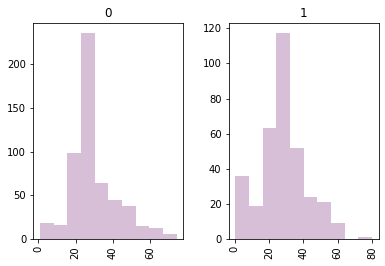

In [23]:
df_train['Age'].hist(by=df_train['Survived'], color='thistle')

0 = Died, 1 = Survived

From the above graphics, we can see a correlation between the 0 - 16 age group and survival. Perhaps this was a policy, such as women and children given priority to rescue equipment. We can also see that the majorty aged between 72-80 years survived.

## IV.) Let's explore the effect of embarkment and fare on survival...

In [24]:
print(pd.pivot_table(df_train, index = 'Survived', columns= 'Embarked', values= 'Ticket', aggfunc= 'count'))

Embarked   C   Q    S
Survived             
0         75  47  427
1         93  30  217


Above we observe that the destination passengers got on had little impact on survival... there is no clear and obvious trend.

Survived
0    AxesSubplot(0.125,0.125;0.775x0.755)
1    AxesSubplot(0.125,0.125;0.775x0.755)
Name: Fare, dtype: object

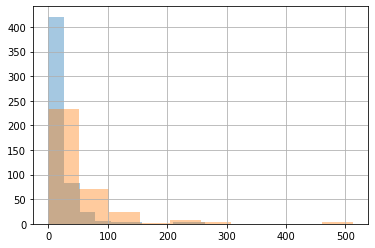

In [25]:
df_train.groupby('Survived').Fare.hist(alpha=0.4)

X_axis = Fare cost
Y_axis = Count

Blue = Died, 
Orange = Survived

We can see that those who paid more for their fare had a much increased chance of survival, and vice-versa or those who paid less. This should be another important feature.

## V.) Let's explore the effect of travelling alone/with family on survival... 

First we determine the total number of passengers travelling alone or with family members.

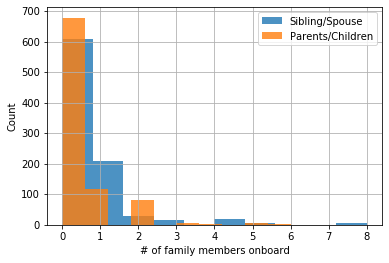

In [26]:
ax = df_train.SibSp.hist(alpha= 0.8)
ax = df_train.Parch.hist(alpha= 0.8)
labels = ['Sibling/Spouse', 'Parents/Children']
ax.set(xlabel= '# of family members onboard', ylabel= 'Count')
plt.legend(labels)
plt.show()

Above we observe that the vast majority of passengers are travelling alone.

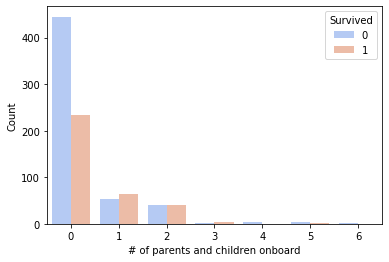

In [27]:
ax = sns.countplot(x ='Parch', hue='Survived', data=df_train, palette="coolwarm")
ax.set(xlabel= '# of parents and children onboard', ylabel= 'Count' )
plt.legend(loc='upper right', title='Survived')
plt.show()

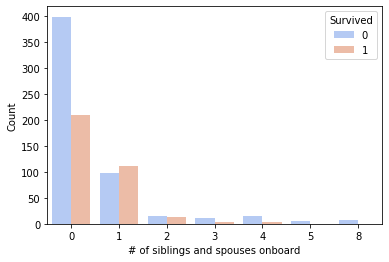

In [28]:
ax = sns.countplot(x ='SibSp', hue='Survived', data=df_train, palette="coolwarm")
ax.set(xlabel= '# of siblings and spouses onboard', ylabel= 'Count' )
plt.legend(loc='upper right', title='Survived')
plt.show()

One observation we can take away fromt this, is that passengers with family members of 2+ onboard had a worse chance of survival.

## VI.) Exploring the effect of titles on survival...

The Name column includes the titles of passengers names. One could convey that this may provide insight into survival chances, so we explore this further.

In [29]:
df_train["Title"] = df_train["Name"].str.extract(r".+,\s([a-zA-z\s]*)")
count = df_train["Title"].value_counts()
count

Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Col               2
Mlle              2
Major             2
Don               1
Jonkheer          1
Ms                1
the Countess      1
Capt              1
Lady              1
Mme               1
Sir               1
Name: Title, dtype: int64

In [30]:
df_train["Title"] = df_train["Title"].apply(lambda x: x if x in count[:4] else "other")
df_train["Title"].value_counts()

Mr        517
Miss      182
Mrs       125
Master     40
other      27
Name: Title, dtype: int64

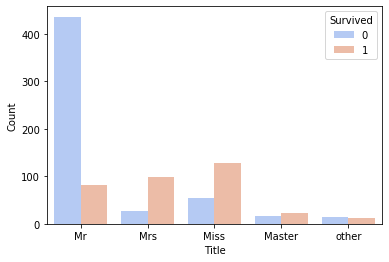

In [31]:
ax = sns.countplot(x ='Title', hue='Survived', data=df_train, palette="coolwarm")
ax.set(xlabel= 'Title', ylabel= 'Count')
plt.legend(loc='upper right', title='Survived')
plt.show()

We see that'Master' (denoting a young boy) would have a higher chance of survival than 'Mr'. This reinforces what we have previously discovered regarding the Age field. Still it proves a useful attribute that can be included as a feature. 

# 3.) Creating a Model

In [33]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr


Adding the Title column to the Test data so it matches. 

In [38]:
df_test["Title"] = df_test["Name"].str.extract(r".+,\s([a-zA-z\s]*)")
count = df_test["Title"].value_counts()

df_test["Title"] = df_test["Title"].apply(lambda x: x if x in count[:4] else "other")

In [39]:
y_train = df_train['Survived']

features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Title']
X_train = pd.get_dummies(df_train[features])
X_test = pd.get_dummies(df_test[features])

In [40]:
# X_train['Age'].fillna(X_train[Age].mean(), inplace= True)
# X_train['Fare'].fillna(X_train[Fare].mean(), inplace= True)

In [41]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

In [42]:
# model = SVC(random_state= 42)
# model.fit(X_train,y_train)
# predictions = model.predict(X_test)

In [43]:
# output = pd.DataFrame({'PassengerID':df_test.PassengerId, 'Survived':predictions})
# output.to_csv('my_submission.csv', index=False)
# print("Your submission was successfully saved!")

We test a few different algorithms to see which comes out on top.

In [44]:
svc = SVC(random_state = 42)
rfc = RandomForestClassifier(random_state = 42)
gnb = GaussianNB()
lr = LogisticRegression(max_iter= 1000)

In [45]:
cv_svc = cross_val_score(svc, X_train, y_train, cv= 5)
cv_rfc = cross_val_score(rfc, X_train, y_train, cv= 5)
cv_gnb = cross_val_score(gnb, X_train, y_train, cv= 5)
cv_lr = cross_val_score(lr, X_train, y_train, cv= 5)
print(cv_svc.mean())
print(cv_rfc.mean())
print(cv_gnb.mean())
print(cv_lr.mean())

0.6723808925993346
0.8114744837110038
0.7912497646098802
0.8181658401858012


Random Forest and Logistic Regression appear to have the best results, but with default settings.
Let's conduct a grid search with these two models to achieve more optimal hyperparameter settings - and hopefully a better score.

In [46]:
from sklearn.model_selection import GridSearchCV

First we perform a grid search for the Random Forest model.

In [47]:
rf = RandomForestClassifier(random_state= 42)
param_grid = {
    'bootstrap': [True],
    'max_depth': [80,90,100],
    'max_features': ["auto","sqrt"],
    'min_samples_leaf': [2,3],
    'min_samples_split': [2,3],
    'n_estimators': [100,200,1000]
}
clf_rf = GridSearchCV(rf, param_grid= param_grid, cv= 5)
best_clf_rf = clf_rf.fit(X_train, y_train)

It may only be marginal, but an imporvement nonetheless!

In [48]:
print(best_clf_rf.best_score_)
print(best_clf_rf.best_params_)

0.8350386039796623
{'bootstrap': True, 'max_depth': 80, 'max_features': 'auto', 'min_samples_leaf': 3, 'min_samples_split': 2, 'n_estimators': 100}


Now to test the Logistic Regression model.

In [53]:
lr = LogisticRegression(random_state= 42)
param_grid = {
    'C': [1, 4, 8],
    'max_iter': [1000, 2000, 4000],
    'solver': ['lbfgs', 'newton-cg'],
    'penalty': ['l2'], 
    
}
clf_lr = GridSearchCV(lr, param_grid= param_grid, cv= 5)
best_clf_lr = clf_lr.fit(X_train, y_train)

In [54]:
print(best_clf_lr.best_score_)
print(best_clf_lr.best_params_)

0.8181658401858012
{'C': 1, 'max_iter': 1000, 'penalty': 'l2', 'solver': 'lbfgs'}


No improvement with this model, however less parameters were tested.

Therefore the Random Forest implementation was the most successful, scoring 0.835!